In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [178]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

In [3]:
with open('/home/diya/Documents/rat-fes/data/pickles/rat-t_session.pkl', 'rb') as inp:
    sessiont = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-26_session.pkl', 'rb') as inp:
    session526 = pickle.load(inp)

# how do decoders trained that day fare

In [4]:
h_angles_512, vaf_angles_512, test_x_angles_512, test_y_angles_512 = session512.decode_angles()
h_angles_526, vaf_angles_526, test_x_angles_526, test_y_angles_526 = session526.decode_angles()
h_angles_t, vaf_angles_t, test_x_angles_t, test_y_angles_t = sessiont.decode_angles()

# limbfoot

## 5/12

In [265]:
h_limbfoot_512 = h_angles_512[:,3]
vaf_limbfoot_512 = np.average(vaf_angles_512, axis=1)[3]
vaf_limbfoot_512_std = np.std(vaf_angles_512, axis=1)[3]
test_y_limbfoot_512=test_y_angles_512[:,3]

0.44982720053972614


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
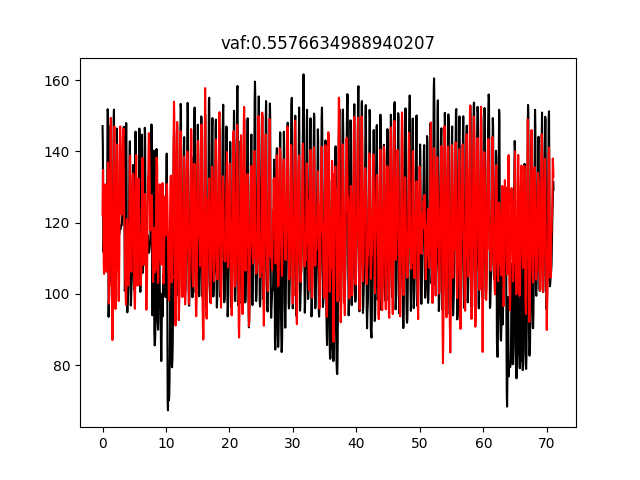

In [249]:
plot_wiener_filter_predic(test_x_angles_512, test_y_limbfoot_512, h_limbfoot_512)
print(vaf_limbfoot_t)

## 5 26

In [266]:
h_limbfoot_526 = h_angles_526[:,3]
vaf_limbfoot_526 = np.average(vaf_angles_526, axis=1)[3]
vaf_limbfoot_526_std = np.std(vaf_angles_526, axis=1)[3]
test_y_limbfoot_526=test_y_angles_526[:,3]

0.2349352962932117


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
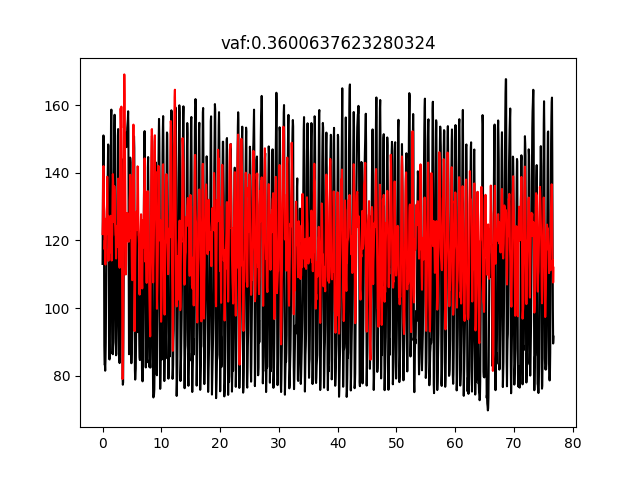

In [251]:
plot_wiener_filter_predic(test_x_angles_526, test_y_limbfoot_526, h_limbfoot_526)
print(vaf_limbfoot_526)

## t

In [263]:
np.std(vaf_angles_t, axis=1)

array([0.06061855, 0.1258829 , 0.09012467, 0.12164687, 0.08753084,
       0.13444887, 0.07852252])

In [267]:
h_limbfoot_t = h_angles_t[:,3]
vaf_limbfoot_t = np.average(vaf_angles_t, axis=1)[3]
vaf_limbfoot_t_std = np.std(vaf_angles_t, axis=1)[3]
test_y_limbfoot_t=test_y_angles_t[:,3]

0.44982720053972614


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
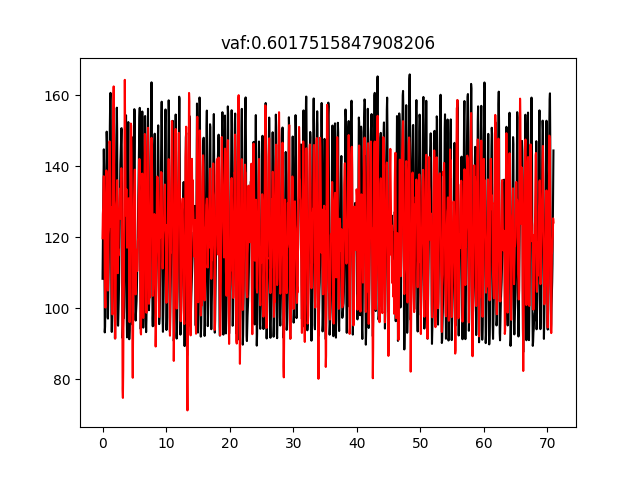

In [253]:
plot_wiener_filter_predic(test_x_angles_t, test_y_limbfoot_t, h_limbfoot_t)
print(vaf_limbfoot_t)

## comparing decoders with limbfoot

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
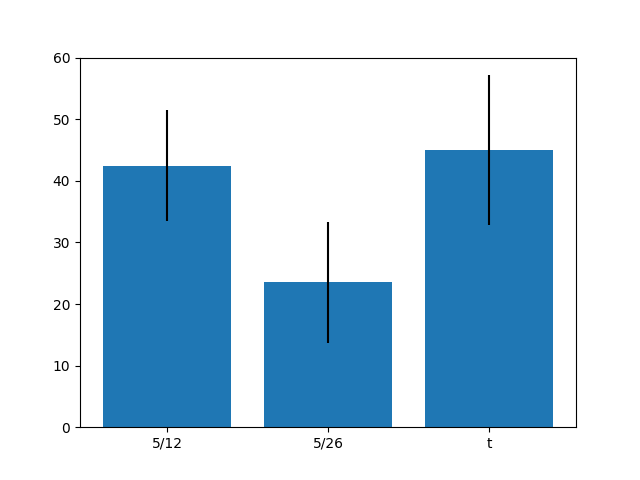

In [268]:
fig0, ax0 = plt.subplots()
names = ['5/12', '5/26', 't']
vafs = [vaf_limbfoot_512*100, vaf_limbfoot_526*100, vaf_limbfoot_t*100]
std = [vaf_limbfoot_512_std * 100, vaf_limbfoot_526_std * 100, vaf_limbfoot_t_std * 100]
ax0.bar(names, vafs, yerr=std)

# testing 512 decoder on 526

## limbfoot

In [270]:
rates_512_format, angles_512_format = session512.stitch_and_format(session512.data['rates'], session512.data['angles'])

In [75]:
rates_526_format, angles_526_format = session526.stitch_and_format(session526.data['rates'], session526.data['angles'])

In [279]:
y_between = test_wiener_filter(rates_526_format, h_angles_512)
y_between_original = test_wiener_filter(rates_526_format, h_angles_526)

In [281]:
vaf_between = vaf(angles_526_format[:,3], y_between[:,3])
vaf_between_original = vaf(angles_526_format[:,3], y_between_original[:,3])

print(vaf_between, vaf_between_original)

0.14119737184544234 0.28776143060006987


<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
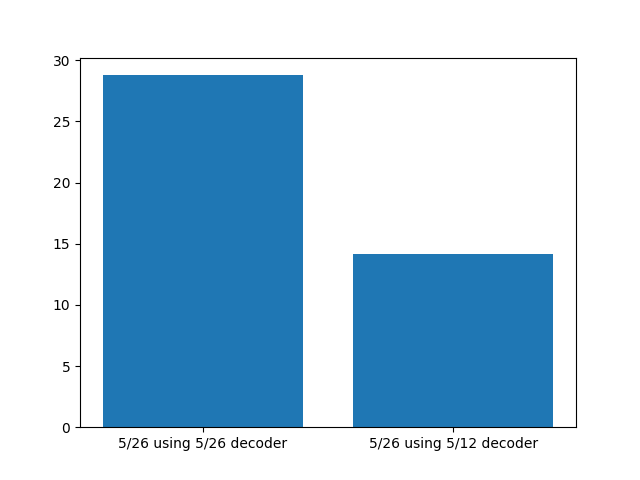

In [291]:
names_1 = ['5/26 using 5/26 decoder', '5/26 using 5/12 decoder']
bars_1 = [vaf_between_original*100, vaf_between*100]

fig1, ax1 = plt.subplots()
ax1.bar(names_1, bars_1)

## and on t?

In [83]:
rates_t_format, angles_t_format = sessiont.stitch_and_format(sessiont.data['rates'], sessiont.data['angles'])

In [285]:
y_between_512_t = test_wiener_filter(rates_t_format, h_angles_512)
y_between_512_t_original = test_wiener_filter(rates_t_format, h_angles_t)

In [287]:
vaf_between_512_t = vaf(angles_t_format[:,3], y_between_512_t[:,3])
vaf_between_512_t_original = vaf(angles_t_format[:,3], y_between_512_t_original[:,3])
print(vaf_between_512_t, vaf_between_512_t_original)

-0.07895792076900121 0.48880312666465087


<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
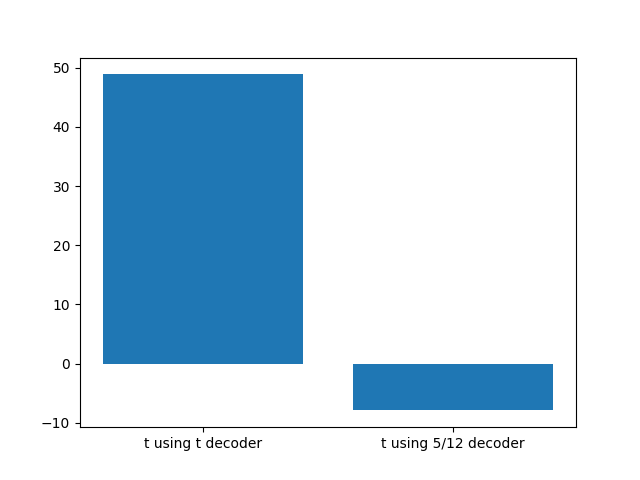

In [292]:
names_2 = ['t using t decoder', 't using 5/12 decoder']
bars_2 = [vaf_between_512_t_original*100, vaf_between_512_t*100]

fig2, ax2 = plt.subplots()
ax2.bar(names_2, bars_2)

# processing --- aligning gaits, resampling, then removing bad ones

In [293]:
indices_512, avg_samples_512 = session512.get_gait_indices()
indices_526, avg_samples_526 = session526.get_gait_indices()

gaits_512, angles_512 = session512.remove_bad_gaits()
gaits_526, angles_526 = session526.remove_bad_gaits(avg_gait_samples = avg_samples_512)

gaits_512 = gaits_512[:gaits_526.shape[0], :, :]
angles_512 = angles_512[:angles_526.shape[0], :, :]

proc_rates_512 = np.reshape(gaits_512, (10560,32))
proc_angles_512 = np.reshape(angles_512, (10560,7))
proc_rates_526 = np.reshape(gaits_526, (10560,32))
proc_angles_526 = np.reshape(angles_526, (10560,7))

## and t?

In [294]:
indices_t, avg_samples_t = sessiont.get_gait_indices()
gaits_t, angles_t = sessiont.remove_bad_gaits(avg_gait_samples = avg_samples_512)

gaits_t = gaits_t[:gaits_526.shape[0], :, :]
angles_t = angles_t[:angles_526.shape[0], :, :]

proc_rates_t = np.reshape(gaits_t, (10560,32))
proc_angles_t = np.reshape(angles_t, (10560,7))

# how does decoding do with processing

In [91]:
h_proc_angles_512, vaf_proc_angles_512, test_x_proc_angles_512, test_y_proc_angles_512 = session512.decode_angles(X=[proc_rates_512], Y=[proc_angles_512])
h_proc_angles_526, vaf_proc_angles_526, test_x_proc_angles_526, test_y_proc_angles_526 = session526.decode_angles(X=[proc_rates_526], Y=[proc_angles_526])
h_proc_angles_t, vaf_proc_angles_t, test_x_proc_angles_t, test_y_proc_angles_t = session526.decode_angles(X=[proc_rates_t], Y=[proc_angles_t])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
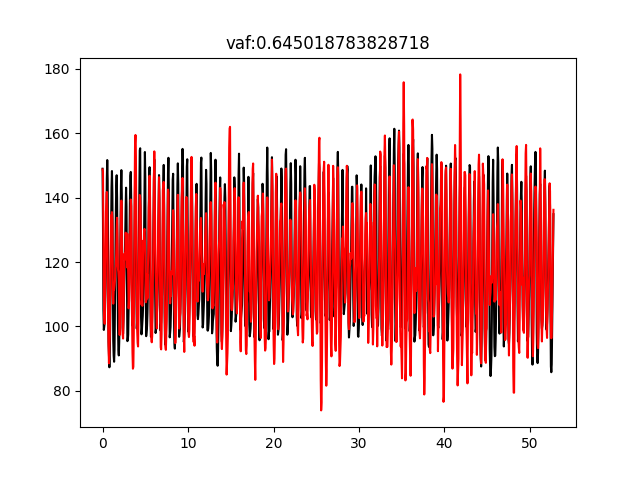

In [295]:
plot_wiener_filter_predic(test_x_proc_angles_512, test_y_proc_angles_512[:,3], h_proc_angles_512[:,3])
proc_512_vaf = np.average(vaf_proc_angles_512, 1)[3]
proc_512_std = np.std(vaf_proc_angles_512, 1)[3]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
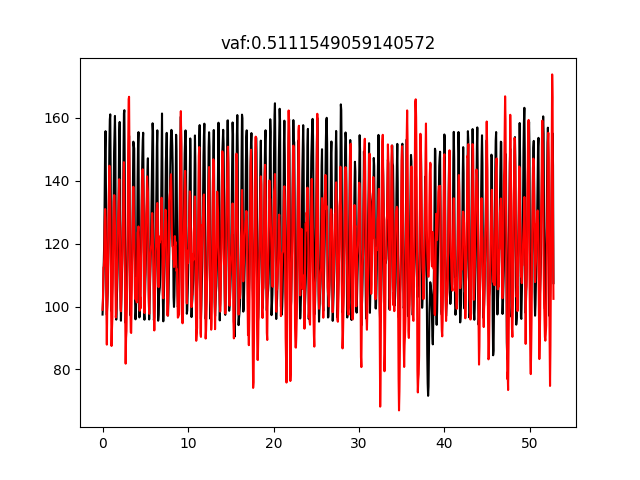

In [296]:
plot_wiener_filter_predic(test_x_proc_angles_526, test_y_proc_angles_526[:,3], h_proc_angles_526[:,3])
proc_526_vaf = np.average(vaf_proc_angles_526, 1)[3]
proc_526_std = np.std(vaf_proc_angles_526, 1)[3]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
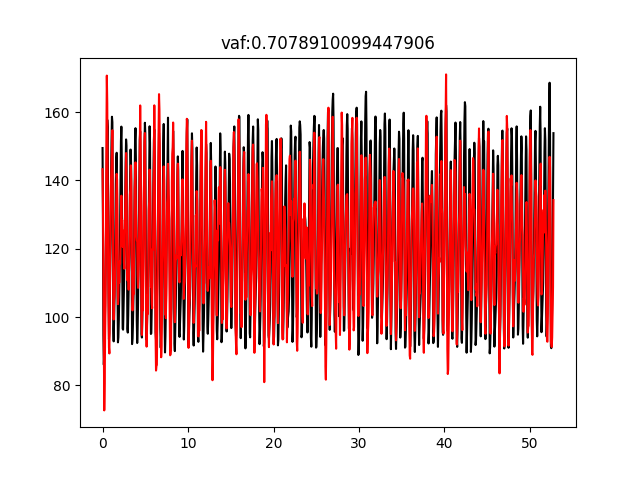

In [297]:
plot_wiener_filter_predic(test_x_proc_angles_t, test_y_proc_angles_t[:,3], h_proc_angles_t[:,3])
proc_t_vaf = np.average(vaf_proc_angles_t, 1)[3]
proc_t_std = np.std(vaf_proc_angles_t, 1)[3]

<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
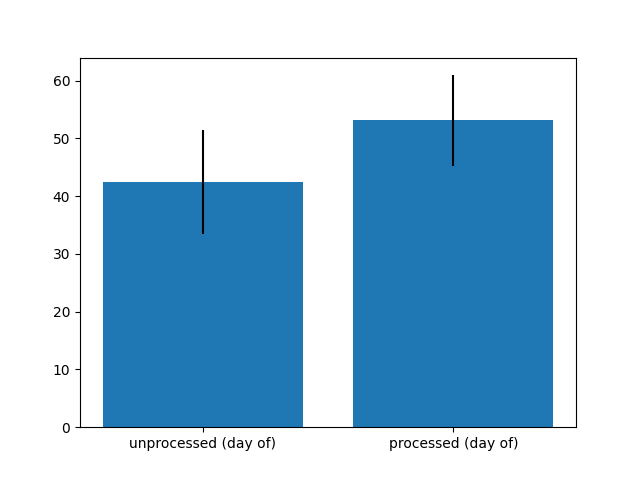

In [302]:
names_3 = ['unprocessed (day of)', 'processed (day of)']
bars_3 = [vaf_limbfoot_512*100, proc_512_vaf * 100]
err_3 = [vaf_limbfoot_512_std * 100, proc_512_std*100]

fig3, ax3 = plt.subplots()
ax3.bar(names_3, bars_3, yerr = err_3)

<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
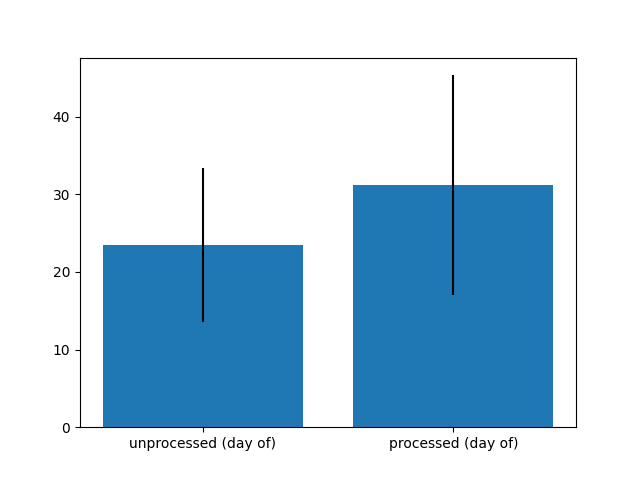

In [301]:
names_4 = ['unprocessed (day of)', 'processed (day of)']
bars_4 = [vaf_limbfoot_526*100, proc_526_vaf * 100]
err_4 = [vaf_limbfoot_526_std * 100, proc_526_std*100]

fig4, ax4 = plt.subplots()
ax4.bar(names_4, bars_4, yerr = err_4)

<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
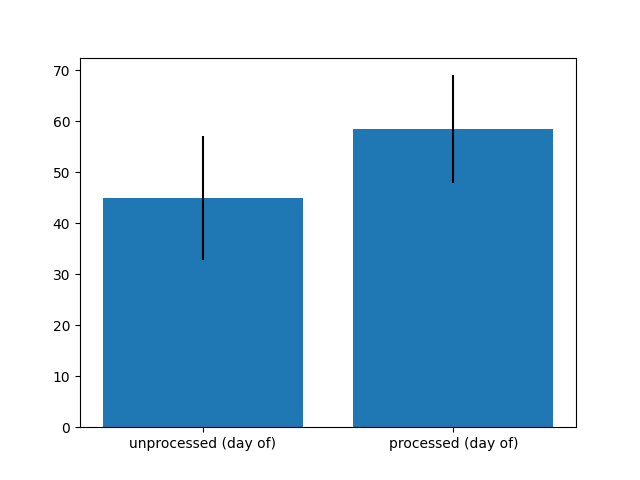

In [303]:
names_5 = ['unprocessed (day of)', 'processed (day of)']
bars_5 = [vaf_limbfoot_t*100, proc_t_vaf * 100]
err_5 = [vaf_limbfoot_t_std * 100, proc_t_std*100]

fig5, ax5 = plt.subplots()
ax5.bar(names_5, bars_5, yerr = err_5)

## and a quick processing sanity check.


In [304]:
rates_512_format, angles_512_format = session512.stitch_and_format(session512.data['rates'], session512.data['angles'])

In [313]:
y_sanity = test_wiener_filter(rates_512_format, h_proc_angles_512)
y_sanity_check = test_wiener_filter(rates_512_format, h_angles_512)

y_sanity_vaf = vaf(angles_512_format, y_sanity)
y_sanity_check_vaf = vaf(angles_512_format, y_sanity_check)

In [316]:
y_sanity_check_vaf

0.3875732016133061

<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
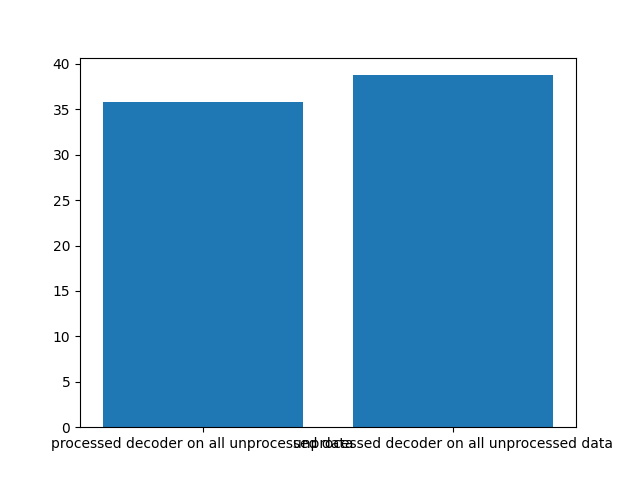

In [317]:
names_6 = ['processed decoder on all unprocessed data', 'unprocessed decoder on all unprocessed data']
bars_6 = [y_sanity_vaf*100, y_sanity_check_vaf * 100]

fig6, ax6 = plt.subplots()
ax6.bar(names_6, bars_6)

# testing processed decoder from 512 on 526

In [78]:
proc_rates_526_format, proc_angles_526_format = format_data(proc_rates_526, proc_angles_526)

In [79]:
y_proc_between = test_wiener_filter(proc_rates_526_format, h_proc_angles_512)

In [81]:
vaf_proc_between = vaf(proc_angles_526_format[:,3], y_proc_between[:,3])
print(vaf_proc_between)

0.221462346640394


## and on t

In [93]:
proc_rates_t_format, proc_angles_t_format = format_data(proc_rates_t, proc_angles_t)

In [94]:
y_proc_between_512_t = test_wiener_filter(proc_rates_t_format, h_proc_angles_512)

In [ ]:
vaf_proc_between_512_t = vaf(proc_angles_t_format[:,3], y_proc_between_512_t[:,3])
print(vaf_proc_between_512_t)

<BarContainer object of 2 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
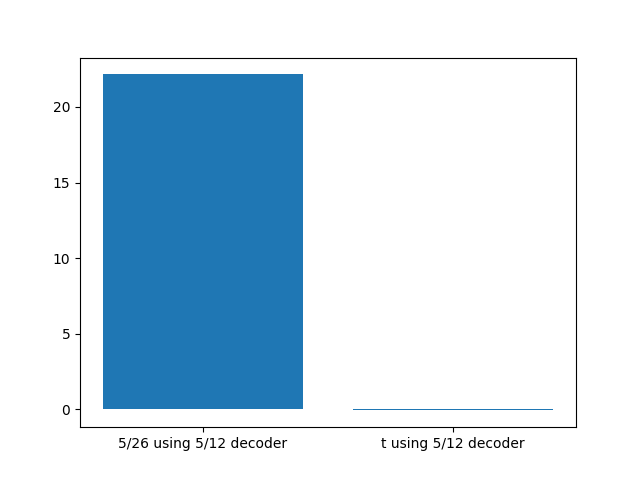

In [319]:
names_7 = ['5/26 using 5/12 decoder', 't using 5/12 decoder']
bars_7 = [vaf_proc_between*100, vaf_proc_between_512_t * 100]

fig7, ax7 = plt.subplots()
ax7.bar(names_7, bars_7)

# CCA 

In [329]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [330]:
cca12 = CCA(n_components=32, scale=False)
X_512_cca, X_526_cca=cca12.fit_transform(proc_rates_512, proc_rates_526)

In [334]:
channels = [0,1,2]

In [337]:
corr_512_526 = []
corr_512_t = []
for number in channels:
    corr_512_526.append(np.corrcoef(proc_rates_512[:,number], proc_rates_526[:,number])[0,1])
    corr_512_t.append(np.corrcoef(proc_rates_512[:,number], proc_rates_t[:,number])[0,1])
    

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
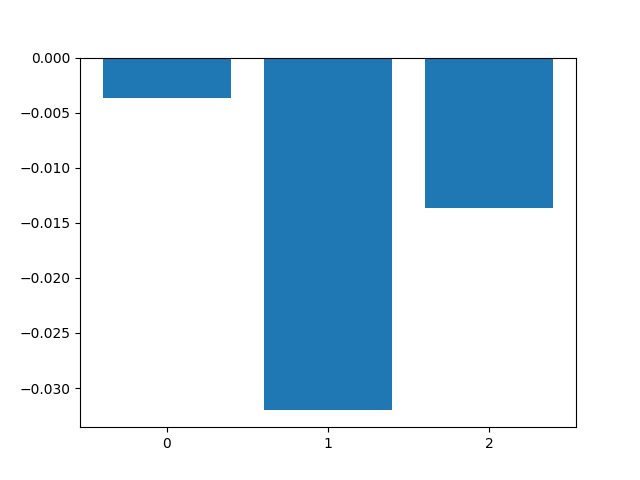

In [341]:
names_8 = [str(ex) for ex in channels]
bars_8 = corr_512_526

fig8, ax8 = plt.subplots()
ax8.bar(names_8, bars_8)

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
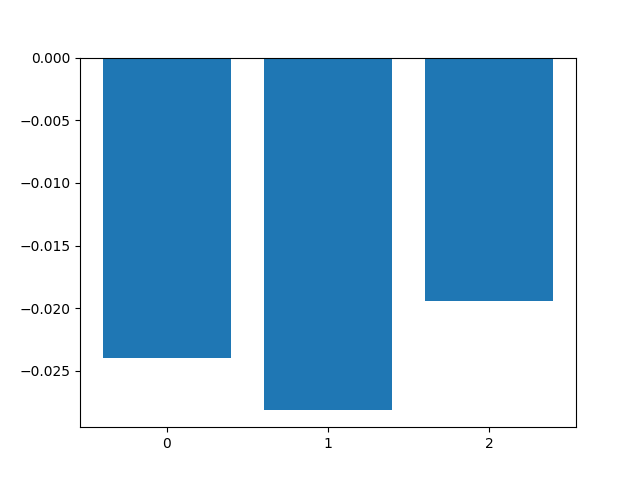

In [342]:
names_9 = [str(ex) for ex in channels]
bars_9 = corr_512_t

fig9, ax9 = plt.subplots()
ax9.bar(names_9, bars_9)

In [344]:
corr_512_526_cca = []
corr_512_t_cca = []
for number in channels:
    corr_512_526_cca.append(np.corrcoef(X_512_cca[:,number],  X_526_cca[:,number])[0,1])
    corr_512_t_cca.append(np.corrcoef(X_5t_cca[:,number], X_t_cca[:,number])[0,1])

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
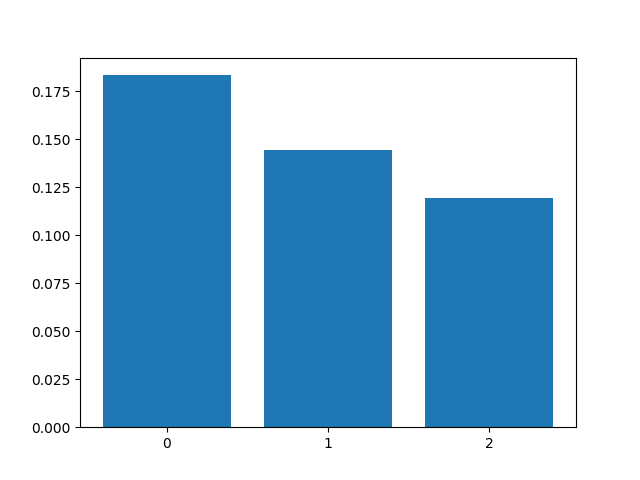

In [345]:
names_10 = [str(ex) for ex in channels]
bars_10 = corr_512_526_cca

fig10, ax10 = plt.subplots()
ax10.bar(names_10, bars_10)

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
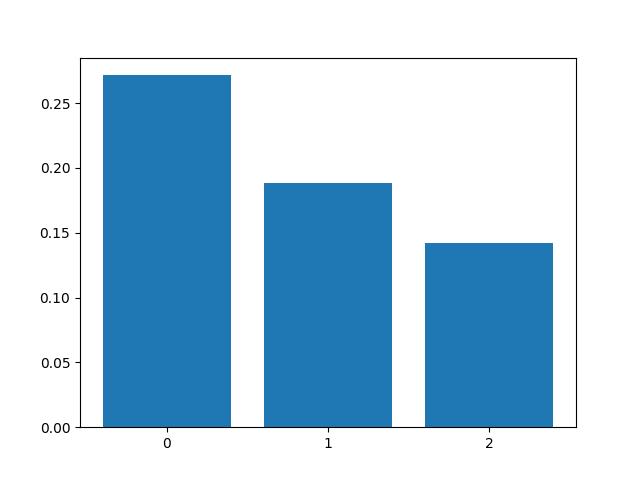

In [346]:
names_11 = [str(ex) for ex in channels]
bars_11 = corr_512_t_cca

fig11, ax11 = plt.subplots()
ax11.bar(names_11, bars_11)

In [64]:
covar1 = np.corrcoef(proc_rates_512[:, 15], proc_rates_526[:, 15])
print(f'{np.round(covar1[0,1]*100)}% correlation')

-2.0% correlation


In [65]:
covar1 = np.corrcoef(X_512_cca[:, 7], X_526_cca[:, 7])
print(f'{np.round(covar1[0,1]*100)}% correlation')

8.0% correlation


## and with t

In [97]:
cca_t = CCA(n_components=32, scale=False)
X_5t_cca, X_t_cca=cca_t.fit_transform(proc_rates_512, proc_rates_t)

In [99]:
covar1 = np.corrcoef(X_5t_cca[:, 1], X_t_cca[:, 1])
print(f'{np.round(covar1[0,1]*100)}% correlation')

19.0% correlation


## lets get fake_proc_rates_512 from 526

In [66]:
fake_proc_rates_512 = cca12.inverse_transform(X_526_cca) 

In [69]:
fake_proc_rates_512_format, proc_angles_526_format = format_data(fake_proc_rates_512, proc_angles_526)

In [70]:
y_fake_proc_between = test_wiener_filter(fake_proc_rates_512_format, h_proc_angles_512)

In [361]:
scrap = test_wiener_filter(proc_rates_526_format, h_proc_angles_526)

In [362]:
scrap_vaf = vaf(proc_angles_526_format[:,3], scrap[:,3])

In [363]:
scrap_vaf

0.38020846951355647

In [82]:
vaf_fake_proc_between = vaf(proc_angles_526_format[:,3], y_fake_proc_between[:,3])
print(vaf_fake_proc_between)

0.289894778505013


<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
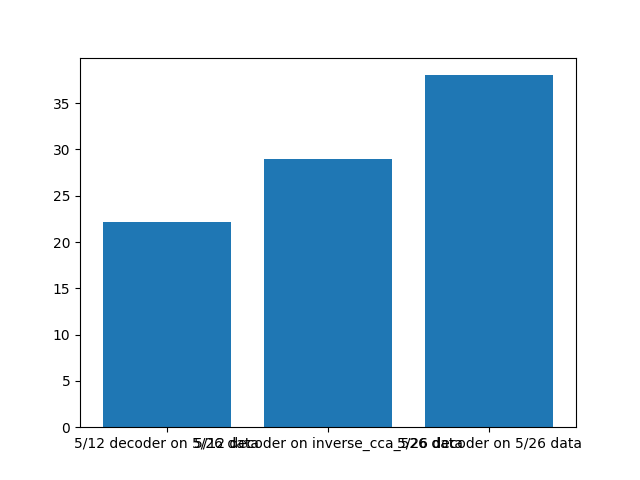

In [366]:
names_11 = ['5/12 decoder on 5/26 data', '5/12 decoder on inverse_cca_526 data', '5/26 decoder on 5/26 data']
bars_11 = [vaf_proc_between*100, vaf_fake_proc_between*100, scrap_vaf*100]

fig11, ax11 = plt.subplots()
ax11.bar(names_11, bars_11)

## lets get fake_proc_rates_512 from t

In [100]:
fake_proc_rates_512_t = cca_t.inverse_transform(X_t_cca) 

In [101]:
fake_proc_rates_512_t_format, proc_angles_t_format = format_data(fake_proc_rates_512_t, proc_angles_t)

In [102]:
y_fake_proc_between_t = test_wiener_filter(fake_proc_rates_512_t_format, h_proc_angles_512)

In [367]:
scrappy = test_wiener_filter(proc_rates_t_format, h_proc_angles_t)

In [368]:
scrappy_vaf = vaf(proc_angles_t_format[:,3], scrappy[:,3])

In [369]:
scrappy_vaf

0.6196294214496652

In [103]:
vaf_fake_proc_between_t = vaf(proc_angles_t_format[:,3], y_fake_proc_between_t[:,3])
print(vaf_fake_proc_between_t)

0.4933282822763019


<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
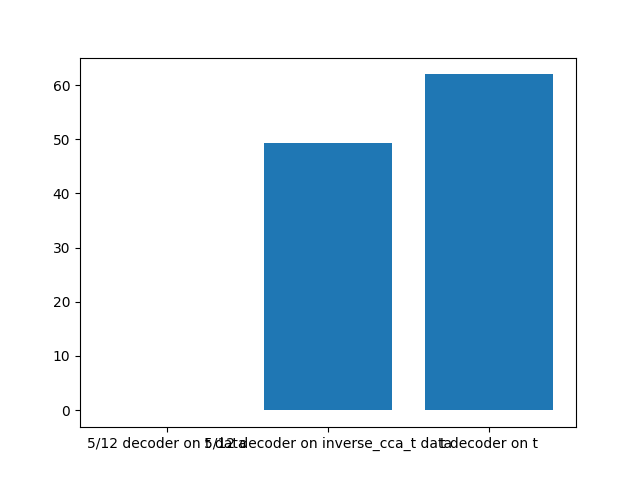

In [370]:
names_12 = ['5/12 decoder on t data', '5/12 decoder on inverse_cca_t data', 't decoder on t']
bars_12 = [vaf_proc_between_512_t*100, vaf_fake_proc_between_t*100, scrappy_vaf*100]

fig12, ax12 = plt.subplots()
ax12.bar(names_12, bars_12)

In [ ]:
names_12 = ['5/12 decoder on t data', '5/12 decoder on inverse_cca_t data']
bars_12 = [vaf_proc_between, vaf_fake_proc_between]

fig11, ax11 = plt.subplots()
ax11.bar(names_11, bars_11)

In [358]:
timestamps = np.linspace(0, (y_fake_proc_between_t[:,3].size * 50)/1000, y_fake_proc_between_t[:,3].size)

In [359]:
timestamps.shape

(10550,)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
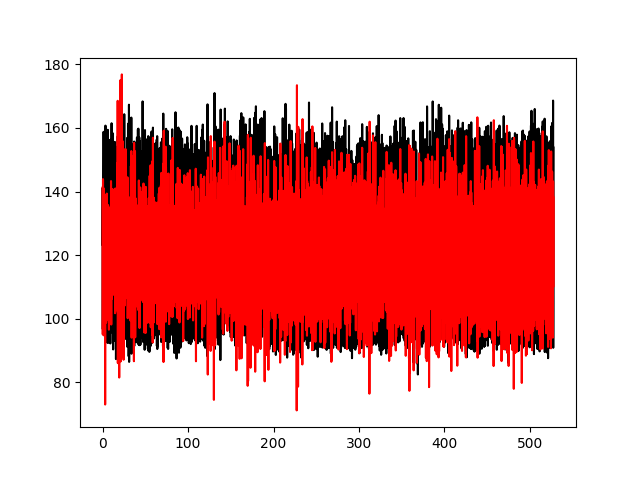

In [360]:
fig, ax = plt.subplots()
ax.plot(timestamps, proc_angles_t_format[:,3], c='black')
ax.plot(timestamps, y_fake_proc_between_t[:,3], c='red')

In [107]:
t_indices, t_avg_samples = sessiont.get_gait_indices()
t_gait_rates, t_gait_angles = sessiont.divide_into_gaits()
df = sessiont.neuron_tuning()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
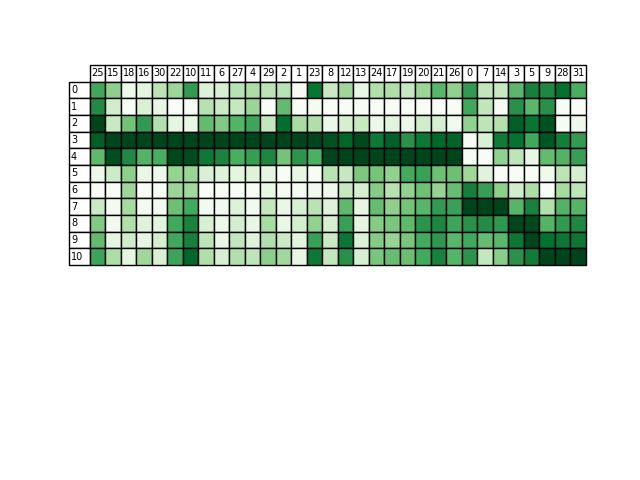

In [108]:
plot_raster(df)

# visualizing with some PCA

In [166]:
from sklearn.decomposition import PCA

In [223]:
pca_t = PCA(n_components=2)
pca_t.fit(proc_rates_t)

pca_512 = PCA(n_components=2)
pca_512.fit(proc_rates_512)

pca_526 = PCA(n_components=2)
pca_526.fit(proc_rates_526)

PCA(n_components=2)

In [224]:
gaits_t_pca=[]
for row in gaits_t:
    gaits_t_pca.append(pca_t.transform(row))
    
gaits_t_pca = np.array(gaits_t_pca)

gaits_512_pca=[]
for row in gaits_512:
    gaits_512_pca.append(pca_512.transform(row))
    
gaits_512_pca = np.array(gaits_512_pca)

gaits_526_pca=[]
for row in gaits_526:
    gaits_526_pca.append(pca_526.transform(row))
    
gaits_526_pca = np.array(gaits_526_pca)

In [320]:
listicle = [gaits_512_pca, gaits_526_pca]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
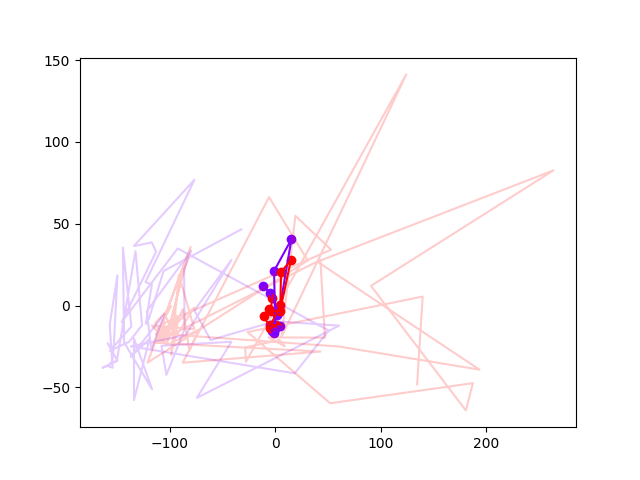

In [328]:
plot_gait_state_space_2D(listicle)

In [325]:
pca_526_fromcca = PCA(n_components=2)
pca_526_fromcca.fit(X_526_cca)

pca_512_526fromcca = PCA(n_components=2)
pca_512_526fromcca.fit(X_512_cca)

PCA(n_components=2)

In [231]:
pca_t_fromcca = PCA(n_components=2)
pca_t_fromcca.fit(X_t_cca)

pca_512_fromcca = PCA(n_components=2)
pca_512_fromcca.fit(X_5t_cca)


PCA(n_components=2)

In [238]:
X_t_cca_reshape = np.reshape(X_t_cca, (960, 11, 32))
X_5t_cca_reshape = np.reshape(X_5t_cca, (960, 11, 32))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
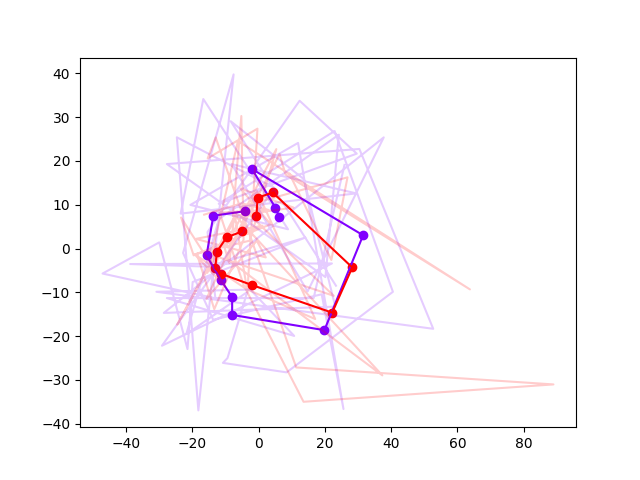

In [241]:
listicle_cca = [X_5t_cca_reshape, X_t_cca_reshape]
plot_gait_state_space_2D(listicle_cca)